In [31]:
import tensorflow as tf

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
batch_size = 16

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = [0.7, 1],
    rotation_range = 45,
    width_shift_range = .05,
    height_shift_range = .05
)

train_it = datagen.flow_from_directory(
    '/content/drive/My Drive/ispyscreenshots_data/data/data',
    class_mode='binary',
    batch_size=batch_size
)

val_it = datagen.flow_from_directory(
    '/content/drive/My Drive/ispyscreenshots_data/data/val',
    class_mode='binary',
    batch_size=batch_size
)

Found 5672 images belonging to 2 classes.
Found 601 images belonging to 2 classes.


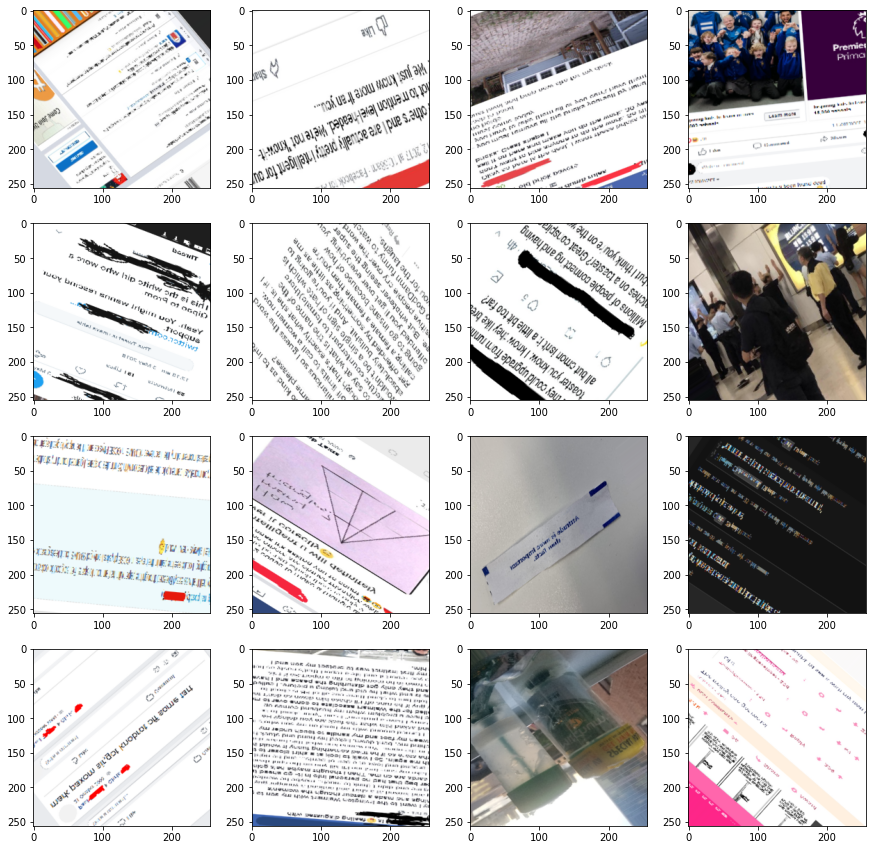

In [37]:
figsize(15, 15)
batch = train_it.next()[0]
for i in range(4 * 4):
    subplot(4, 4, i+1)
    imshow(batch[i, :, :])

In [38]:
train_it.next()[1]

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

In [39]:
base_model = tf.keras.applications.DenseNet169(weights=None, include_top=False, input_shape=(160, 160, 3))
base_model.trainable = True

In [40]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 5, 5, 1664)        12642880  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1664)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1665      
Total params: 12,644,545
Trainable params: 12,486,145
Non-trainable params: 158,400
_________________________________________________________________


In [43]:
ckpt_dir = "/content/drive/My Drive/ispyscreenshots_ckpt"
import os
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_{epoch}")
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_prefix, save_weights_only=True)

In [54]:
ckpt_dir = "/content/drive/My Drive/ispyscreenshots_ckpt"
import os
ckpt2_prefix = os.path.join(ckpt_dir, "ckpt2_{epoch}")
ckpt2_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt2_prefix, save_weights_only=True)

In [58]:
ckpt_dir = "/content/drive/My Drive/ispyscreenshots_ckpt"
import os
ckpt3_prefix = os.path.join(ckpt_dir, "ckpt3_{epoch}")
ckpt3_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt3_prefix, save_weights_only=True)

In [51]:
history = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // batch_size,
    validation_data=val_it, 
    validation_steps=val_it.samples // batch_size,
    epochs=12,
    callbacks=[ckpt_callback]
)

Epoch 1/12
354/354 [==============================] - 345s 975ms/step - loss: 0.2327 - accuracy: 0.9178 - val_loss: 26.8841 - val_accuracy: 0.3345
Epoch 2/12
354/354 [==============================] - 340s 960ms/step - loss: 0.2015 - accuracy: 0.9268 - val_loss: 0.9590 - val_accuracy: 0.6740
Epoch 3/12
354/354 [==============================] - 342s 966ms/step - loss: 0.1912 - accuracy: 0.9330 - val_loss: 0.1560 - val_accuracy: 0.9443
Epoch 4/12
354/354 [==============================] - 344s 972ms/step - loss: 0.1873 - accuracy: 0.9341 - val_loss: 0.1487 - val_accuracy: 0.9510
Epoch 5/12
354/354 [==============================] - 344s 972ms/step - loss: 0.1746 - accuracy: 0.9383 - val_loss: 0.3021 - val_accuracy: 0.9223
Epoch 6/12
354/354 [==============================] - 340s 961ms/step - loss: 0.1746 - accuracy: 0.9385 - val_loss: 2.0500 - val_accuracy: 0.7111
Epoch 7/12
354/354 [==============================] - 340s 960ms/step - loss: 0.1630 - accuracy: 0.9417 - val_loss: 0.1343 

In [52]:
old_val = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    '/content/drive/My Drive/ispyscreenshots_data/data/val',
    class_mode='binary',
    batch_size=batch_size
)

Found 601 images belonging to 2 classes.


In [53]:
model.evaluate(old_val)

38/38 [==============================] - 28s 750ms/step - loss: 0.3507 - accuracy: 0.9201


[0.3506644666194916, 0.920133113861084]

In [57]:
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.0001)
history2 = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // batch_size,
    validation_data=old_val, 
    validation_steps=old_val.samples // batch_size,
    epochs=12,
    callbacks=[ckpt2_callback]
)

Epoch 1/12
354/354 [==============================] - 332s 938ms/step - loss: 0.1040 - accuracy: 0.9694 - val_loss: 0.1223 - val_accuracy: 0.9578
Epoch 2/12
354/354 [==============================] - 331s 935ms/step - loss: 0.0867 - accuracy: 0.9715 - val_loss: 0.1165 - val_accuracy: 0.9662
Epoch 3/12
354/354 [==============================] - 329s 929ms/step - loss: 0.0865 - accuracy: 0.9712 - val_loss: 0.0941 - val_accuracy: 0.9662
Epoch 4/12
354/354 [==============================] - 332s 939ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 0.1086 - val_accuracy: 0.9595
Epoch 5/12
354/354 [==============================] - 337s 951ms/step - loss: 0.0783 - accuracy: 0.9754 - val_loss: 0.1071 - val_accuracy: 0.9628
Epoch 6/12
354/354 [==============================] - 338s 956ms/step - loss: 0.0726 - accuracy: 0.9770 - val_loss: 0.1768 - val_accuracy: 0.9375
Epoch 7/12
354/354 [==============================] - 342s 967ms/step - loss: 0.0844 - accuracy: 0.9722 - val_loss: 0.0953 -

In [59]:
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.00005)
tf.keras.backend.set_value(model.optimizer.beta_1, 0.93)
history2 = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // batch_size,
    validation_data=old_val, 
    validation_steps=old_val.samples // batch_size,
    epochs=5,
    callbacks=[ckpt3_callback]
)

Epoch 1/5
354/354 [==============================] - 332s 937ms/step - loss: 0.0643 - accuracy: 0.9788 - val_loss: 0.1183 - val_accuracy: 0.9595
Epoch 2/5
354/354 [==============================] - 329s 929ms/step - loss: 0.0581 - accuracy: 0.9797 - val_loss: 0.1386 - val_accuracy: 0.9595
Epoch 3/5
354/354 [==============================] - 327s 924ms/step - loss: 0.0634 - accuracy: 0.9813 - val_loss: 0.1235 - val_accuracy: 0.9611
Epoch 4/5
354/354 [==============================] - 329s 928ms/step - loss: 0.0588 - accuracy: 0.9802 - val_loss: 0.1091 - val_accuracy: 0.9662
Epoch 5/5
354/354 [==============================] - 329s 930ms/step - loss: 0.0586 - accuracy: 0.9807 - val_loss: 0.0916 - val_accuracy: 0.9696


In [60]:
model.evaluate(val_it)

38/38 [==============================] - 33s 874ms/step - loss: 0.0786 - accuracy: 0.9767


[0.07856611162424088, 0.9767054915428162]

In [64]:
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.00005)
tf.keras.backend.set_value(model.optimizer.beta_1, 0.93)
history3 = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // batch_size,
    validation_data=old_val, 
    validation_steps=old_val.samples // batch_size,
    epochs=10,
    initial_epoch=6,
    callbacks=[ckpt3_callback]
)

Epoch 7/10
354/354 [==============================] - 330s 932ms/step - loss: 0.0594 - accuracy: 0.9802 - val_loss: 0.1231 - val_accuracy: 0.9595
Epoch 8/10
354/354 [==============================] - 329s 931ms/step - loss: 0.0623 - accuracy: 0.9788 - val_loss: 0.0899 - val_accuracy: 0.9696
Epoch 9/10
354/354 [==============================] - 330s 931ms/step - loss: 0.0561 - accuracy: 0.9804 - val_loss: 0.1029 - val_accuracy: 0.9679
Epoch 10/10
354/354 [==============================] - 329s 929ms/step - loss: 0.0564 - accuracy: 0.9807 - val_loss: 0.1058 - val_accuracy: 0.9628


In [65]:
model.evaluate(val_it)

38/38 [==============================] - 33s 865ms/step - loss: 0.0703 - accuracy: 0.9800


[0.07029407471418381, 0.980033278465271]

In [66]:
model.save('/content/drive/My Drive/ispyscreenshots_ckpt/model.h5')

In [69]:
test_temp = ImageDataGenerator(
    rescale=1./255,
).flow_from_directory(
    '/content/drive/My Drive/ispyscreenshots_data/test',
    class_mode='binary'
)

Found 2 images belonging to 2 classes.


In [72]:
model.predict(test_temp)

array([[0.00527931],
       [0.2955392 ]], dtype=float32)

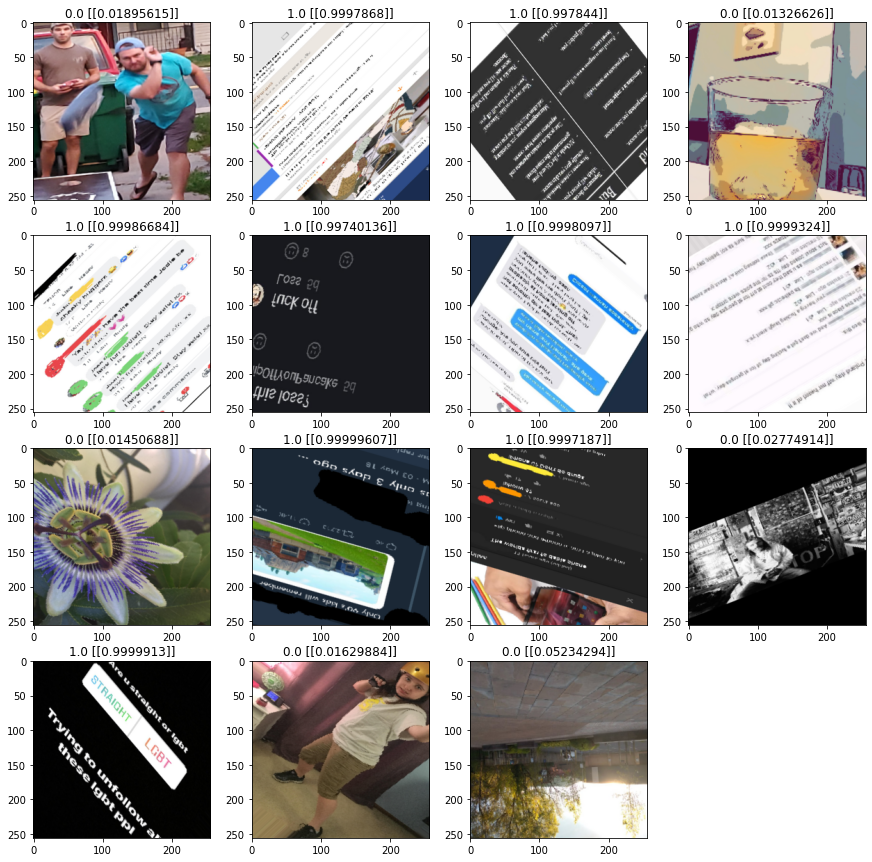

In [108]:
figsize(15, 15)
batch = val_it.next()

for i in range(15):
    subplot(4, 4, i+1)
    imshow(batch[0][i, :, :])
    title(str(batch[1][i]) + " " + str(model.predict(np.expand_dims(batch[0][i], 0))))

In [106]:
print(np.expand_dims(batch[0][0], 0).shape)

(1, 256, 256, 3)
